# Plot alignment statistics of barcode library

## Load libraries and define analysis-specific parameters

PB: We should add rasilabRtemplates to the Docker and Singularity containers. 

In [1]:
suppressMessages(library(Biostrings))
suppressMessages(library(plyranges))
suppressMessages(library(tidyverse))

## Read alignment log

In [2]:
align_log <- list.files("../data/alignments/", pattern = "*.log", full.names = T) %>% 
  enframe("sno", "file") %>% 
  mutate(log = map(file, readLines)) %>% 
  mutate(sample_name = str_extract(file, "[^/]+(?=.bowtie2.log)")) %>% 
  select(-sno, -file) %>% 
  unnest() %>% 
  print()

Warning message:
“`cols` is now required when using unnest().
Please use `cols = c(log)`”


# A tibble: 24 × 2
   log                                             sample_name          
   <chr>                                           <chr>                
 1 "53234670 reads; of these:"                     didi_grna_1_barcode_1
 2 "  53234670 (100.00%) were unpaired; of these:" didi_grna_1_barcode_1
 3 "    48170057 (90.49%) aligned 0 times"         didi_grna_1_barcode_1
 4 "    5064613 (9.51%) aligned exactly 1 time"    didi_grna_1_barcode_1
 5 "    0 (0.00%) aligned >1 times"                didi_grna_1_barcode_1
 6 "9.51% overall alignment rate"                  didi_grna_1_barcode_1
 7 "35623492 reads; of these:"                     didi_grna_2_barcode_1
 8 "  35623492 (100.00%) were unpaired; of these:" didi_grna_2_barcode_1
 9 "    32136048 (90.21%) aligned 0 times"         didi_grna_2_barcode_1
10 "    3487444 (9.79%) aligned exactly 1 time"    didi_grna_2_barcode_1
# … with 14 more rows


##  How many total reads and reads with expected barcodes?


── Column specification ────────────────────────────────────────────────────────
cols(
  sample_name = col_character(),
  type = col_character(),
  count = col_double()
)



# A tibble: 12 × 4
   sample_name           read  type      count
   <chr>                 <chr> <chr>     <dbl>
 1 didi_grna_1_barcode_1 total all    53234670
 2 didi_grna_1_barcode_1 aln   unique  5064613
 3 didi_grna_1_barcode_1 aln   multi         0
 4 didi_grna_2_barcode_1 total all    35623492
 5 didi_grna_2_barcode_1 aln   unique  3487444
 6 didi_grna_2_barcode_1 aln   multi         0
 7 didi_mrna_1_barcode_1 total all    43657826
 8 didi_mrna_1_barcode_1 aln   unique  3762908
 9 didi_mrna_1_barcode_1 aln   multi         1
10 didi_mrna_2_barcode_1 total all    56095292
11 didi_mrna_2_barcode_1 aln   unique  5178373
12 didi_mrna_2_barcode_1 aln   multi         0


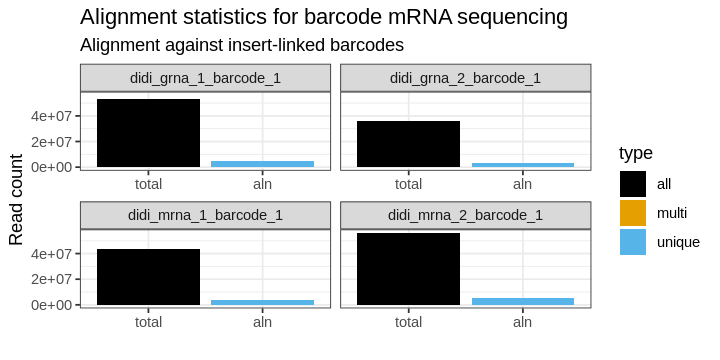

In [3]:
options(repr.plot.width=6, repr.plot.height=3)

plot_data <- align_log %>% 
  mutate(total_all = str_extract(log, "^[:digit:]+(?= reads;)")) %>% 
  mutate(aln_unique = str_extract(log, "[:digit:]+(?=.+exactly)")) %>% 
  mutate(aln_multi = str_extract(log, "[:digit:]+(?=.+>1)")) %>% 
  select(-log) %>% 
  pivot_longer(-sample_name, names_to = 'type', values_to = 'count') %>% 
  filter(!is.na(count)) %>% 
  type_convert() %>% 
  separate(type, c("read", "type")) %>% 
  print()

plot_data %>% 
  ggplot(aes(x = fct_rev(read), y = count, fill = type)) +
  facet_wrap(~sample_name, ncol = 2, scales = "free_x") +
  geom_col() +
  ggthemes::scale_fill_colorblind() +
  theme_bw() +
  labs(x = "", y = "Read count",
       title = "Alignment statistics for barcode mRNA sequencing",
       subtitle = "Alignment against insert-linked barcodes")

## Get readcounts for each barcode

In [4]:
barcode_counts <- list.files("../data/barcode_counts/", pattern = ".tsv.gz$", full.names = T) %>% 
  enframe("sno", "file") %>% 
  mutate(counts = map(file, read_tsv)) %>% 
  mutate(sample_name = str_extract(file, "[^/]+(?=.tsv.gz)")) %>% 
  select(-sno, -file) %>% 
  unnest() %>% 
  rename(barcode_count = count, barcode_num = barcode) %>% 
  mutate(sample_name = str_extract(sample_name, ".+(?=_barcode)")) %>% 
  print()

Rows: 16302 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (2): barcode, count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 15021 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (2): barcode, count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 17275 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (2): barcode, count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 19388 Columns: 2
── Column specification ────────────────────────────────────────────────────────

# A tibble: 67,986 × 3
   barcode_num barcode_count sample_name
         <dbl>         <dbl> <chr>      
 1       23374          4582 didi_grna_1
 2       22034          3821 didi_grna_1
 3       25702          3797 didi_grna_1
 4       16901          3778 didi_grna_1
 5        2082          3694 didi_grna_1
 6       35422          3587 didi_grna_1
 7       34631          3431 didi_grna_1
 8       35803          3412 didi_grna_1
 9       18250          3393 didi_grna_1
10        3780          3114 didi_grna_1
# … with 67,976 more rows


## Get insert-barcode linkages

In [5]:
align_log <- list.files("../data/alignments/", pattern = "*.log", full.names = T) %>% print 

insert_barcode_linkages <- list.files("../../pool2_linkage/data/filtered_barcodes/", 
                                      pattern = ".tsv.gz$", full.names = T) %>% 
  enframe("sno", "file") %>% 
  mutate(counts = map(file, read_tsv)) %>% 
  mutate(sample_name = str_extract(file, "[^/]+(?=.tsv.gz)")) %>% 
  select(-sno, -file) %>% 
  unnest(cols = c(counts)) %>%
  rename(linkage_count = read_count, linkage_ref = sample_name) %>% 
  select(-barcode_1) %>%
  print()

[1] "../data/alignments//didi_grna_1_barcode_1.bowtie2.log"
[2] "../data/alignments//didi_grna_2_barcode_1.bowtie2.log"
[3] "../data/alignments//didi_mrna_1_barcode_1.bowtie2.log"
[4] "../data/alignments//didi_mrna_2_barcode_1.bowtie2.log"


Rows: 35804 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): barcode_1
dbl (3): insert_num, barcode_num, read_count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 48659 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): barcode_1
dbl (3): insert_num, barcode_num, read_count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 84,463 × 4
   insert_num barcode_num linkage_count linkage_ref   
        <dbl>       <dbl>         <dbl> <chr>         
 1        268           1            10 didi_linkage_1
 2        184           2            10 didi_linkage_1
 3         75           3            10 didi_linkage_1
 4         47           4            10 didi_linkage_1
 5         25           5            10 didi_linkage_1
 6        201           6            10 didi_linkage_1
 7        193           7            10 didi_linkage_1
 8        304           8            10 didi_linkage_1
 9        151           9            10 didi_linkage_1
10        195          10            10 didi_linkage_1
# … with 84,453 more rows


## Get sample annotations

In [6]:

sample_annotations <- read_csv("../annotations/sample_annotations.csv", comment = "#") %>% print()

Rows: 4 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): owner, sample_name, plasmid, library_type, sample_id, linkage_ref
dbl (5): barcode1_read, barcode1_start, barcode1_length, barcode1_trim5, bar...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 4 × 11
  owner sample_name plasmid  library_type sample_id barcode1_read barcode1_start
  <chr> <chr>       <chr>    <chr>        <chr>             <dbl>          <dbl>
1 pb    didi_grna_1 pPBHS309 grna         107p7                 1              0
2 pb    didi_grna_2 pPBHS309 mrna         107p8                 1              0
3 pb    didi_mrna_1 pPBHS309 grna         107p9                 1              0
4 pb    didi_mrna_2 pPBHS309 mrna         107p10                1              0
# … with 4 more variables: barcode1_length <dbl>, linkage_ref <chr>,
#   barcode1_trim5 <dbl>, barcode1_trim3 <dbl>


## Combine barcodes counts with insert linkages

In [7]:
barcode_insert_counts <- barcode_counts %>% 
  left_join(select(sample_annotations, sample_name, linkage_ref, sample_id, library_type), by = "sample_name") %>% 
  left_join(insert_barcode_linkages, by = c("linkage_ref", "barcode_num")) %>%
  print()

# A tibble: 67,986 × 8
   barcode_num barcode_count sample_name linkage_ref    sample_id library_type
         <dbl>         <dbl> <chr>       <chr>          <chr>     <chr>       
 1       23374          4582 didi_grna_1 didi_linkage_1 107p7     grna        
 2       22034          3821 didi_grna_1 didi_linkage_1 107p7     grna        
 3       25702          3797 didi_grna_1 didi_linkage_1 107p7     grna        
 4       16901          3778 didi_grna_1 didi_linkage_1 107p7     grna        
 5        2082          3694 didi_grna_1 didi_linkage_1 107p7     grna        
 6       35422          3587 didi_grna_1 didi_linkage_1 107p7     grna        
 7       34631          3431 didi_grna_1 didi_linkage_1 107p7     grna        
 8       35803          3412 didi_grna_1 didi_linkage_1 107p7     grna        
 9       18250          3393 didi_grna_1 didi_linkage_1 107p7     grna        
10        3780          3114 didi_grna_1 didi_linkage_1 107p7     grna        
# … with 67,976 more rows, an

# Write barcode insert counts to a table for post-processing

In [8]:
barcode_insert_counts %>% 
  select(sample_id, sample_name, insert_num, barcode_num, barcode_count, linkage_count, library_type, linkage_ref) %>% 
  write_tsv('../tables/sample_insert_barcode_counts.tsv.gz') %>%
  print()

# A tibble: 67,986 × 8
   sample_id sample_name insert_num barcode_num barcode_count linkage_count
   <chr>     <chr>            <dbl>       <dbl>         <dbl>         <dbl>
 1 107p7     didi_grna_1         86       23374          4582            26
 2 107p7     didi_grna_1         54       22034          3821            25
 3 107p7     didi_grna_1        150       25702          3797            29
 4 107p7     didi_grna_1         90       16901          3778            20
 5 107p7     didi_grna_1        227        2082          3694            11
 6 107p7     didi_grna_1         85       35422          3587            68
 7 107p7     didi_grna_1         35       34631          3431            56
 8 107p7     didi_grna_1        218       35803          3412           178
 9 107p7     didi_grna_1        165       18250          3393            21
10 107p7     didi_grna_1         64        3780          3114            12
# … with 67,976 more rows, and 2 more variables: library_type <ch

## Plot the number of barcodes per library

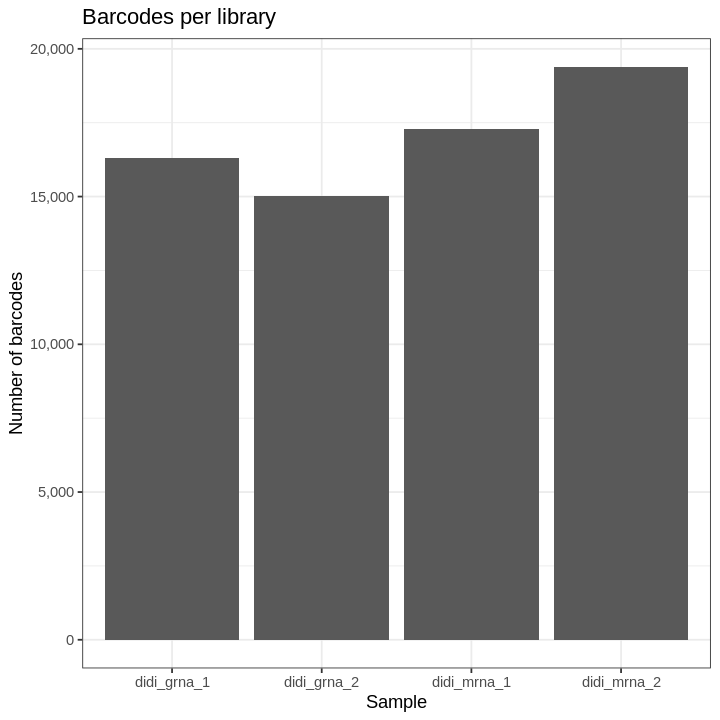

In [9]:
options(repr.plot.width=6, repr.plot.height=6)

plot_data <- barcode_insert_counts %>% 
  group_by(sample_name) %>% 
  distinct(barcode_num) %>% 
  summarize(n_barcodes = dplyr::n()) %>% 
  ungroup()

plot_data %>% 
  ggplot(aes(x = sample_name, y = n_barcodes)) +
  geom_col(position = "dodge") +
  theme_bw() +
  scale_y_continuous(labels = scales::comma) +
  # theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(x = "Sample", y = "Number of barcodes", title = "Barcodes per library") +
  NULL

## Plot CDF of the number of reads per barcode

# A tibble: 67,986 × 9
   barcode_num barcode_count sample_name linkage_ref    sample_id library_type
         <dbl>         <dbl> <chr>       <chr>          <chr>     <chr>       
 1       28050          9491 didi_mrna_2 didi_linkage_2 107p10    mrna        
 2       30966          9291 didi_mrna_2 didi_linkage_2 107p10    mrna        
 3       20087          6607 didi_mrna_2 didi_linkage_2 107p10    mrna        
 4       30812          6125 didi_mrna_1 didi_linkage_1 107p9     grna        
 5        2262          5928 didi_mrna_1 didi_linkage_1 107p9     grna        
 6       46718          5671 didi_mrna_2 didi_linkage_2 107p10    mrna        
 7       17962          5481 didi_mrna_2 didi_linkage_2 107p10    mrna        
 8       12150          5423 didi_mrna_2 didi_linkage_2 107p10    mrna        
 9        9249          5359 didi_mrna_2 didi_linkage_2 107p10    mrna        
10       43384          5335 didi_mrna_2 didi_linkage_2 107p10    mrna        
# … with 67,976 more rows, an

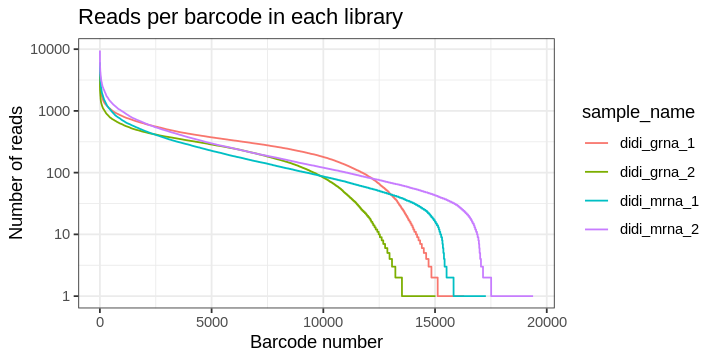

In [10]:
options(repr.plot.width=6, repr.plot.height=3)

plot_data <- barcode_insert_counts %>% 
  group_by(sample_name) %>% 
  arrange(-barcode_count) %>% 
  mutate(xaxis = 1:(dplyr::n())) %>% 
  ungroup() %>% 
  print()

plot_data %>% 
  ggplot(aes(x = xaxis, y = barcode_count, color = sample_name)) +
  geom_line(aes(group = sample_name)) +
  theme_bw() +
  scale_y_log10() +
  labs(x = "Barcode number", y = "Number of reads",
       title = "Reads per barcode in each library") +
  NULL

## Plot CDF of the number of reads per insert, summed over barcodes

`summarise()` has grouped output by 'sample_name'. You can override using the `.groups` argument.


# A tibble: 1,268 × 4
   sample_name insert_num read_count xaxis
   <chr>            <dbl>      <dbl> <int>
 1 didi_mrna_2        150      54185     1
 2 didi_mrna_2        282      49114     2
 3 didi_grna_1         31      45310     1
 4 didi_mrna_2        149      43747     3
 5 didi_mrna_2         30      42804     4
 6 didi_grna_1         21      42753     2
 7 didi_grna_1         23      41621     3
 8 didi_grna_1         86      40749     4
 9 didi_grna_1        297      40142     5
10 didi_mrna_2        151      38871     5
# … with 1,258 more rows


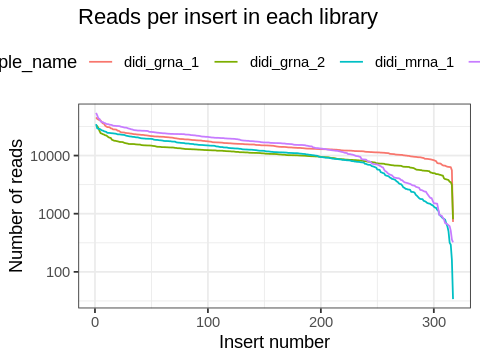

In [11]:
options(repr.plot.width=4, repr.plot.height=3)

plot_data <- barcode_insert_counts %>% 
  group_by(sample_name, insert_num) %>% 
  summarize(read_count = sum(barcode_count)) %>% 
  ungroup() %>% 
  group_by(sample_name) %>% 
  arrange(-read_count) %>% 
  mutate(xaxis = 1:(dplyr::n())) %>% 
  ungroup() %>% 
  print()

plot_data %>% 
  ggplot(aes(x = xaxis, y = read_count, color = sample_name)) +
  geom_line(aes(group = sample_name)) +
  theme_bw() +
  theme(legend.position = "top") +
  scale_y_log10() +
  labs(x = "Insert number", y = "Number of reads",
       title = "Reads per insert in each library") +
  NULL

## Plot read counts of mRNA vs gRNA, summed for each insert


`summarise()` has grouped output by 'library_type'. You can override using the `.groups` argument.


# A tibble: 317 × 3
   insert_num  grna  mrna
        <dbl> <dbl> <dbl>
 1          0 21361 30042
 2          1 26441 42806
 3          2 21616 22562
 4          3 18855  9413
 5          4 12383 13781
 6          5  8793 11438
 7          6 12807 12797
 8          7  9305  5475
 9          8 24180 32605
10          9 30220 36237
# … with 307 more rows


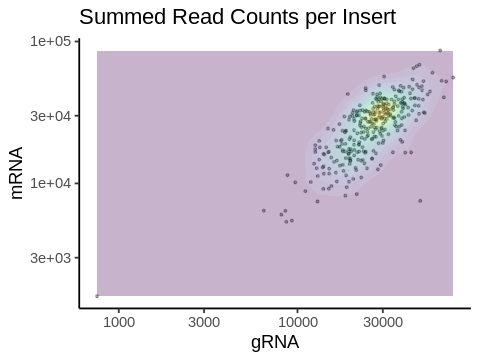

In [12]:
plot_data <- barcode_insert_counts %>% 
  group_by(library_type, insert_num) %>%
  summarize(read_count = sum(barcode_count)) %>%
  ungroup() %>%
  select(insert_num, read_count, library_type) %>%
  pivot_wider(names_from = "library_type", values_from = "read_count") %>%
  print()

plot_data %>%
  filter(!is.na(grna), !is.na(mrna)) %>%
  ggplot(aes(x = grna, y = mrna)) +
  geom_point(alpha = 0.3, size = 0.5) +
  geom_density_2d_filled(alpha = 0.3, show.legend = F) +
  theme_classic() +
  scale_x_log10() +
  scale_y_log10() +
  labs(x = "gRNA", y = "mRNA",
       title = "Summed Read Counts per Insert") +
  NULL